# Identifying labels which touch the background
In developmental biology it is a common task to differentiate layers of cells, for example in epithelial tissue. Therefore it might be useful to know if a cell is part of an outer layer, if it touches the background. In this notebook we measure and visualize this.

For demonstrating it we simulate a clumb of cells.

In [1]:
import pyclesperanto_prototype as cle

# import a function from a file in the same folder
from simulated_cell_clumb import simulate_data

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
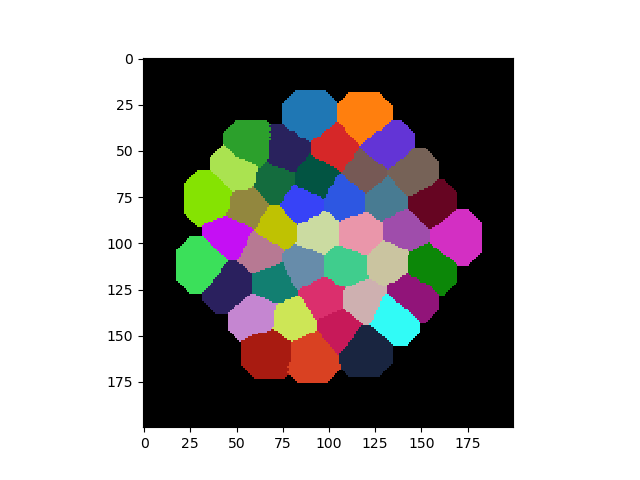

In [2]:
cells = simulate_data()
cells

## Determining which cells touch the background
To determine which cells touch the background, we need to produce a touch matrix which tells us which objects touch which others.

cl.OCLArray([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.]], dtype=float32)
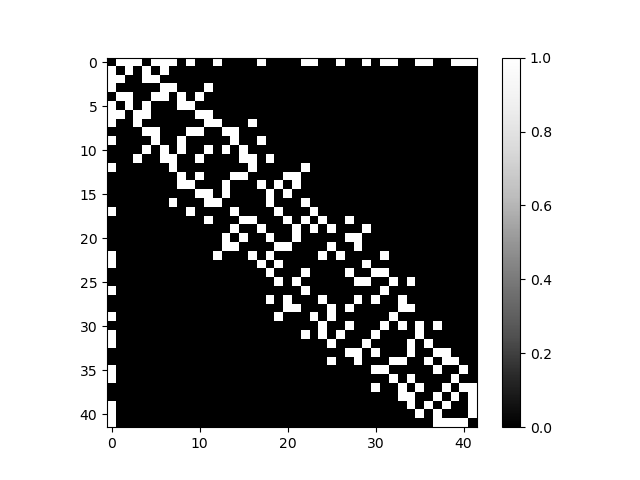
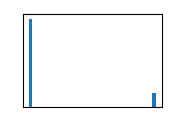

In [3]:
touch_matrix = cle.generate_touch_matrix(cells)
touch_matrix

The first row and column in this image represent objects touching the background. We can read out this first row or column like this:

In [4]:
touching_background = touch_matrix[0]
touching_background

cl.OCLArray([0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1.], dtype=float32)

And we can visualized it in the original image coordinates.

cl.OCLArray([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
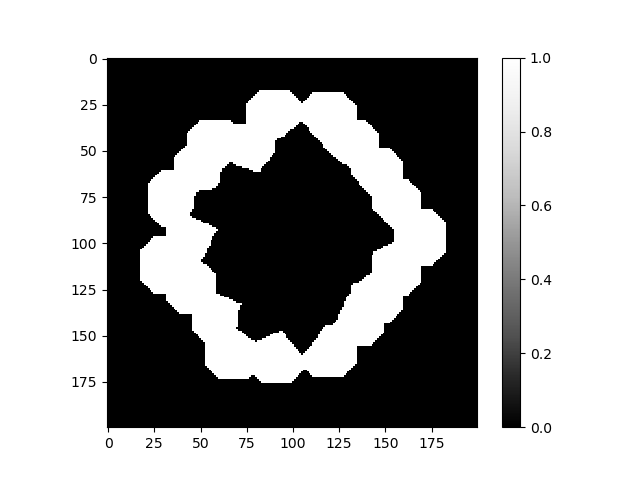
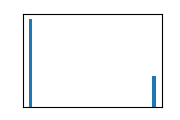

In [5]:
cle.replace_intensities(cells, touching_background)

Or we can get a label image representing those objects.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
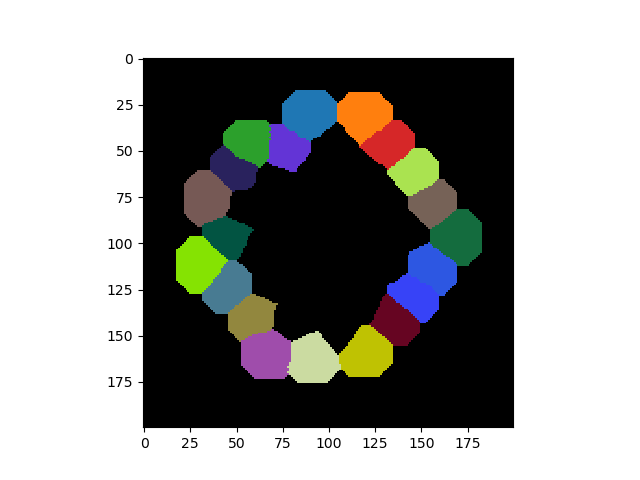

In [6]:
cle.exclude_labels(cle.binary_not([touching_background]), cells)